In [20]:
import sys
from build_graph import Graph
import networkx as nx
import matplotlib.pyplot as plt
from numpy import log10
import pandas as pd
import numpy as np

In [9]:
usernames = ["JustinTrudeau", "ElizabethMay", "theJagmeetSingh", "AndrewScheer", "MaximeBernier"]
G = Graph(usernames).G

100%|██████████| 11684/11684 [00:02<00:00, 5692.70it/s]
--- 7978 tweets, 36450 retweeters, 113293 retweets ---


In [25]:
def centrality_per_topic(G, username=None):
    """
        Calculates the eigenvector centrality for a network G, and then takes the sums/averages the centrality of tweets grouped by topic. 
        Parameters
        ----------
        :param G: The networkx Graph to calculate centrality from

        :param username: `optional` if present only uses that user's tweets when calculating the mean.

        :param measure: `optional` Options are ('mean','sum','zscore'). Choooses how to represent the aggregate zscores
    """
    netx_graph = G.copy()
    # centrality = nx.eigenvector_centrality_numpy(netx_graph)
    centrality = nx.eigenvector_centrality_numpy(netx_graph)
    topic_centrality = dict((topic, []) for topic in range(NUM_TOPICS))
    for node in netx_graph.nodes():
        node_attributes = netx_graph.nodes[node]
        node_centrality = centrality[node]
        if "lda_cluster" in node_attributes:
            if username and username in netx_graph.neighbors(node) or username is None:
                topic = node_attributes["lda_cluster"]
                if topic in topic_centrality:
                    topic_centrality[topic].append(node_centrality)
                else:
                    topic_centrality[topic] = [node_centrality]
    return topic_centrality

In [23]:
usernames =["JustinTrudeau", "ElizabethMay", "theJagmeetSingh", "AndrewScheer", "MaximeBernier"]
G = Graph(usernames).G

100%|██████████| 11684/11684 [00:03<00:00, 3794.62it/s]
--- 7978 tweets, 36450 retweeters, 113293 retweets ---


In [40]:
centrality_dict = centrality_per_topic(G)
centrality_dict.pop(-1)

[0.00013265566041681154,
 2.3694416486689812e-05,
 2.3694416486690517e-05,
 1.9816243580579533e-05,
 8.72694479432833e-05,
 8.726944794328296e-05]

In [41]:
centrality_df = pd.DataFrame({ key:pd.Series(value) for key, value in centrality_dict.items() })
centrality_df.head()

,0,1,2,3,4,5,6
0,0.000483,0.000480,0.000124,0.000113,0.000243,0.000116,0.000144
1,0.000175,0.000132,0.000122,0.000481,0.000137,0.001331,0.000116
2,0.000132,0.000468,0.000114,0.000119,0.000124,0.000173,0.000107
3,0.000433,0.000104,0.000123,0.000453,0.000488,0.000886,0.000110
4,0.000244,0.000493,0.000101,0.000502,0.000092,0.000153,0.000135


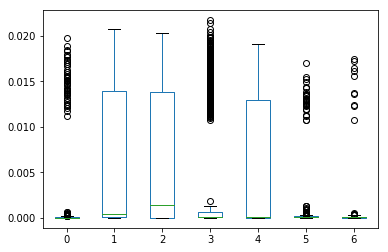

In [42]:
centrality_df.boxplot(grid=False)
plt.show()

In [49]:
# load packages
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(centrality_df[0].dropna(),centrality_df[1].dropna(),centrality_df[2].dropna(),centrality_df[3].dropna(),centrality_df[4].dropna(),centrality_df[5].dropna())
print(fvalue, pvalue)

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols
# reshape the d dataframe suitable for statsmodels package 
d_melt = pd.melt(centrality_df.reset_index(), id_vars=['index'], value_vars=list(centrality_df.columns))
# replace column names
d_melt.columns = ['index', 'treatments', 'value']
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

208.95400153635208 7.278344997059318e-210


SyntaxError: invalid syntax (<ipython-input-53-6f6cb8443ca1>, line 1)

In [12]:
sum_overall_topic_centralities = centrality_per_topic(G)


ValueError: arrays must all be same length